In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten

In [ ]:
data=[]
labels=[]
Parasitized=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [ ]:
Cells=np.array(data)
labels=np.array(labels)

In [ ]:
np.save("/content/drive/My Drive/Colab Notebooks/Cells64",Cells)
np.save("/content/drive/My Drive/Colab Notebooks/labels64",labels)

In [2]:
Cells=np.load("/content/drive/My Drive/Colab Notebooks/Cells64.npy")
labels=np.load("/content/drive/My Drive/Colab Notebooks/labels64.npy")

In [3]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [4]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [5]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [6]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [7]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [10]:
model = Sequential()
inputShape = (64, 64, 3)
 
model.add(Conv2D(32, kernel_size=(3,3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(MaxPooling2D(pool_size=2))
 
model.add(Flatten())
model.add(Dense(4000))
model.add(Dense(2))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 4000)              32772000  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])

In [12]:
history = model.fit(x = x_train, y = y_train,
                    epochs = 20, validation_data = (x_test,y_test),
                    verbose = 1)

Epoch 1/20
776/776 [==============================] - 21s 18ms/step - loss: 1.9937 - accuracy: 0.6574 - val_loss: 0.4084 - val_accuracy: 0.9024
Epoch 2/20
776/776 [==============================] - 14s 18ms/step - loss: 0.3729 - accuracy: 0.8896 - val_loss: 0.3441 - val_accuracy: 0.8799
Epoch 3/20
776/776 [==============================] - 14s 18ms/step - loss: 0.3366 - accuracy: 0.8965 - val_loss: 0.3876 - val_accuracy: 0.8853
Epoch 4/20
776/776 [==============================] - 14s 18ms/step - loss: 0.3322 - accuracy: 0.9017 - val_loss: 0.3511 - val_accuracy: 0.8566
Epoch 5/20
776/776 [==============================] - 14s 18ms/step - loss: 0.3210 - accuracy: 0.8990 - val_loss: 0.3528 - val_accuracy: 0.8857
Epoch 6/20
776/776 [==============================] - 14s 18ms/step - loss: 0.3204 - accuracy: 0.9075 - val_loss: 0.3346 - val_accuracy: 0.9049
Epoch 7/20
776/776 [==============================] - 14s 18ms/step - loss: 0.3180 - accuracy: 0.9079 - val_loss: 0.3158 - val_accuracy:

In [13]:
model.save("/content/drive/My Drive/Colab Notebooks/Shallownet64/PKLShallowNet64.h5")

In [14]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

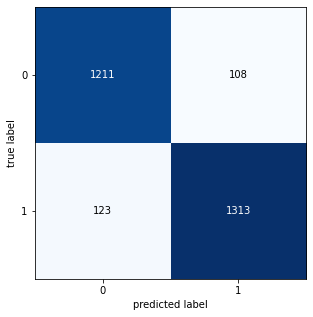

In [15]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()